<a href="https://colab.research.google.com/github/flybiubiu/cs231n/blob/master/TwoLayerNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nholmber/google-colab-cs231n.git
%cd google-colab-cs231n/assignment1
!pip install imageio
%cd cs231n/datasets/
!/content/google-colab-cs231n/assignment1/cs231n/datasets/get_datasets.sh
%cd '/content/google-colab-cs231n/assignment1'

Cloning into 'google-colab-cs231n'...
remote: Enumerating objects: 109, done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 109
Receiving objects: 100% (109/109), 5.07 MiB | 3.45 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/google-colab-cs231n/assignment1
/content/google-colab-cs231n/assignment1/cs231n/datasets
--2019-11-19 08:48:20--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  15.0MB/s    in 12s     

2019-11-19 08:48:33 (13.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-b

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std = 1e-1)
def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

In [10]:
scores = net.loss(X)
print ('Your scores:')
print (scores)
print ('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print (correct_scores)
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
Difference between your scores and correct scores:
3.6802720745909845e-08


In [11]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.03793083921158713


In [12]:
from cs231n.gradient_check import eval_numerical_gradient
loss, grads = net.loss(X, y, reg=0.1)
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 7.558486e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11


Final training loss: 0.017161536411917686


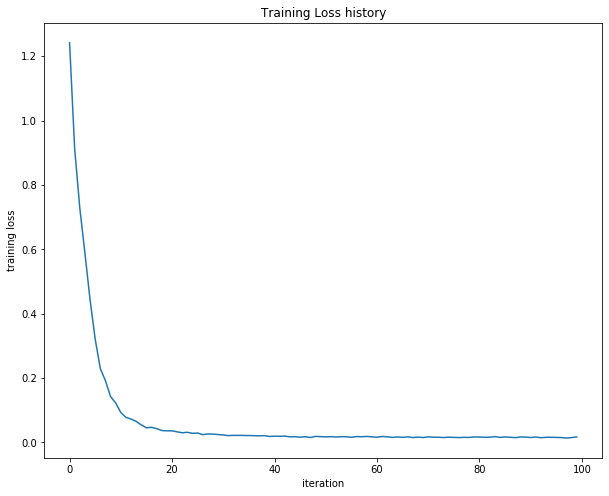

In [13]:
net = init_toy_model()
stats = net.train(X, y, X, y, learning_rate=1e-1, reg=1e-5, num_iters=100, verbose=False)
print ('Final training loss:', stats['loss_history'][-1])
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [15]:
from cs231n.data_utils import load_CIFAR10
def get_CIFAR10_data(num_training = 49000, num_validation=1000, num_test=1000):
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image

  X_train = X_train.reshape(num_training, -1)
  X_val = X_val.reshape(num_validation, -1)
  X_test = X_test.reshape(num_test, -1)
  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [16]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=400,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)
val_acc = (net.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.303350
iteration 100 / 1000: loss 1.930958
iteration 200 / 1000: loss 1.827822
iteration 300 / 1000: loss 1.773088
iteration 400 / 1000: loss 1.623086
iteration 500 / 1000: loss 1.624216
iteration 600 / 1000: loss 1.639018
iteration 700 / 1000: loss 1.607392
iteration 800 / 1000: loss 1.597735
iteration 900 / 1000: loss 1.637930
Validation accuracy:  0.477


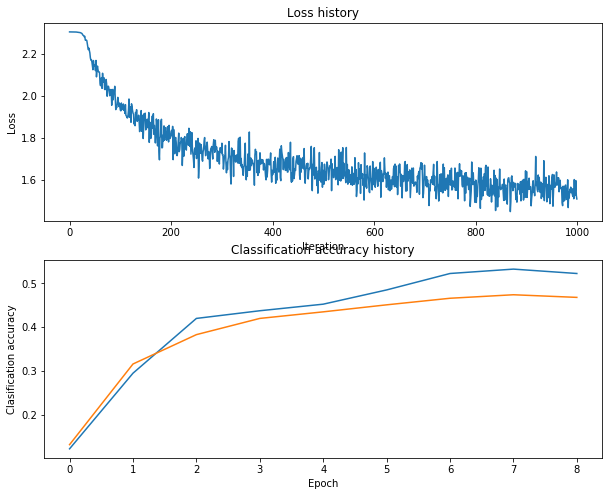

In [19]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

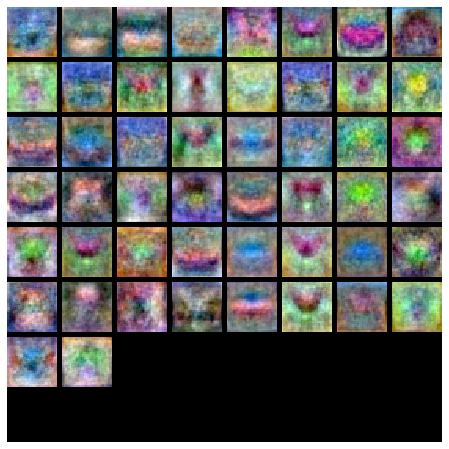

In [20]:
from cs231n.vis_utils import visualize_grid
def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

In [24]:
best_net = None
best_acc = 0
pass
input_size = 32 * 32 * 3
num_classes = 10
for bs in [200, 400]:
    for lr in [1e-3, 1e-4, 1e-5]:
        for hidden_size in [50, 100, 200]:
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=2000, batch_size=bs,
                        learning_rate=lr, learning_rate_decay=0.9,
                        reg=0.5, verbose=True)
            val_acc = (net.predict(X_val) == y_val).mean()
            print ('batch_size = %d, lr = %f, hidden size = %f, Valid_accuracy: %f' %(bs, lr, hidden_size,val_acc))
            if val_acc > best_acc:
                best_acc = val_acc
                best_net = net

iteration 0 / 2000: loss 2.303380
iteration 100 / 2000: loss 1.921412
iteration 200 / 2000: loss 1.761668
iteration 300 / 2000: loss 1.716642
iteration 400 / 2000: loss 1.631712
iteration 500 / 2000: loss 1.510211
iteration 600 / 2000: loss 1.625638
iteration 700 / 2000: loss 1.631711
iteration 800 / 2000: loss 1.660734
iteration 900 / 2000: loss 1.621021
iteration 1000 / 2000: loss 1.568691
iteration 1100 / 2000: loss 1.625937
iteration 1200 / 2000: loss 1.534193
iteration 1300 / 2000: loss 1.592856
iteration 1400 / 2000: loss 1.610985
iteration 1500 / 2000: loss 1.531326
iteration 1600 / 2000: loss 1.580863
iteration 1700 / 2000: loss 1.597558
iteration 1800 / 2000: loss 1.496739
iteration 1900 / 2000: loss 1.458412
batch_size = 200, lr = 0.001000, hidden size = 50.000000, Valid_accuracy: 0.499000
iteration 0 / 2000: loss 2.304132
iteration 100 / 2000: loss 1.980249
iteration 200 / 2000: loss 1.799823
iteration 300 / 2000: loss 1.659834
iteration 400 / 2000: loss 1.779168
iteration 5

best validation accuracy =  0.499


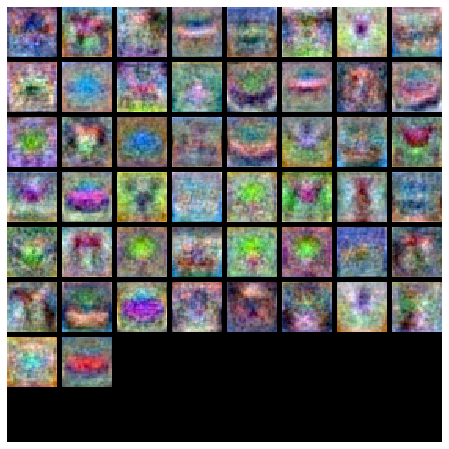

In [27]:
print ('best validation accuracy = ', best_acc)
show_net_weights(best_net)

In [28]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print ('Test accuracy: ', test_acc)

Test accuracy:  0.481
